In [1]:
import numpy as np

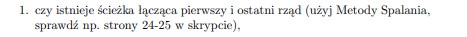

In [32]:
L = 16
p = 0.9
net = np.zeros((L,L))
for i in range(L):
    for j in range(L):
        r = np.random.uniform(0,1)
        if r < p:
            net[i,j] = 1
        else:
            net[i,j] = 0

In [33]:
t = 2
for i in range(L):
    if net[0, i] == 1:
        net[0,i] = 2
any_neigbhours = True
last_row_reached = False

In [34]:
while any_neigbhours and not(last_row_reached):
    neigbours = 0
    for i in range(L):
        for j in range(L):
            if net[i,j] == t:
                if i - 1 >= 0:
                    if net[i - 1, j] == 1:
                        net[i - 1, j] = t + 1
                        neigbours += 1
                if i + 1 < L:
                    if net[i + 1, j] == 1:
                        net[i + 1, j] = t + 1
                        neigbours += 1
                if j - 1 >= 0:
                    if net[i, j - 1] == 1:
                        net[i, j - 1] = t + 1
                        neigbours += 1
                if j + 1 < L:
                    if net[i, j + 1] == 1:
                        net[i, j + 1] = t + 1
                        neigbours += 1
    for i in range(L):
        if t > 2:
            if net[L-1, i] == t-1:
                last_row_reached = True
    if neigbours == 0:
        any_neigbhours = False
    t += 1
if last_row_reached:
    print("Istnieje ścieżka łącząca pierwszy i ostatni rząd")
else:
    print("Nie istnieje ścieżka łącząca pierwszy i ostatni rząd")
print(net)
    


Istnieje ścieżka łącząca pierwszy i ostatni rząd
[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  0.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  0.  3.  0.  3.  3.  4.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  5.  4.  5.  4.  4.  5.  4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.  6.  5.  6.  5.  5.  6.  5.  5.  0.  5.  5.]
 [ 6.  6.  6.  6.  6.  7.  6.  7.  6.  6.  7.  6.  6.  7.  6.  6.]
 [ 7.  7.  7.  7.  7.  8.  7.  8.  7.  7.  8.  7.  7.  8.  0.  7.]
 [ 8.  8.  0.  8.  8.  9.  8.  9.  8.  8.  9.  8.  8.  9.  9.  8.]
 [ 9.  9. 10.  9.  0. 10.  9. 10.  9.  9. 10.  9.  9. 10. 10.  9.]
 [10. 10. 11. 10.  0. 11. 10. 11. 10. 10. 11. 10. 10. 11. 11. 10.]
 [11. 11. 12. 11. 12. 12. 11. 12. 11. 11.  0. 11. 11. 12. 12. 11.]
 [12. 12. 13. 12. 13. 13. 12. 13. 12. 12.  0. 12. 12. 13.  0. 12.]
 [ 0. 13. 14. 13. 14. 14. 13. 14. 13. 13. 14. 13. 13. 14. 14. 13.]
 [15. 14. 15.  0. 15. 15.  0. 15. 14. 14. 15. 14. 14. 15. 15. 14.]
 [16. 15.  0. 17. 16. 16. 17. 16. 15. 15. 16. 15. 15.  0. 16. 15.]
 [17. 16. 17.

In [ ]:
def cluster(L, p):
    net = np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            r = np.random.uniform(0,1)
            if r < p:
                net[i,j] = 1
            else:
                net[i,j] = 0
    M_k = [1]
    k = 2
    changed_clusters = []
    for i in range(L):
        for j in range(L):
            if net[i,j] == 1:
                net[i,j] = k
                M_k.append(1)
                break
    for i in range(L):
        for j in range(L):
            if k < 0:
                for change in changed_clusters:
                    if k == change[0]:
                        k = change[1]
                        M_k[change[0] -2] = M_k[change[1]-2]          
            if i - 1 >= 0 or j - 1 >= 0:
                left = net[i, j - 1]
                top = net[i-1, j]
                if left == 0 and top == 0:
                    k += 1
                    net[i,j] = k
                    M_k.append(1)
                elif 2 <= left <= k and top == 0:
                    M_k[left - 2] += 1
                    net[i,j] = left
                elif 2 <= top <= k and left == 0:
                    M_k[top - 2] += 1
                    net[i,j] = top
                elif 2 <= left <= k and 2 <= top <= k:
                    if left != top:
                        net[i,j] = left
                        M_k[left - 2] += (M_k[top - 2] + 1)
                        M_k[top - 2] *= -1
                        changed_clusters.append([top, left])
                    if left == top:
                        net[i,j] = left
                        M_k[left - 2] += 1
            else:
                k += 1
                net[i,j] = k
                M_k[k-2] += 1




